In [281]:
import csv
import networkx as nx
import matplotlib.pyplot as pl
from networkx.algorithms import bipartite 


In [282]:
disease = set()
symptoms = set()
with open('dataset.csv') as file:
    data = csv.reader(file)
    for line in data:
        if line[0] != '':
            disease.add(line[0])
        for i in line[1:]:
            if(i != ''):
                symptoms.add(i)

print(disease)

{'Gastroenteritis', 'Jaundice', '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis B', 'Varicose veins', 'Pneumonia', 'Alcoholic hepatitis', 'Cervical spondylosis', 'Bronchial Asthma', 'Migraine', 'AIDS', 'Hepatitis C', 'Dimorphic hemmorhoids(piles)', 'Common Cold', 'GERD', 'Chronic cholestasis', 'Psoriasis', 'Impetigo', 'Dengue', 'hepatitis A', 'Urinary tract infection', 'Fungal infection', 'Hepatitis D', 'Typhoid', 'Allergy', 'Diabetes ', 'Malaria', 'Hepatitis E', 'Heart attack', 'Drug Reaction', 'Osteoarthristis', 'Arthritis', 'Peptic ulcer diseae', 'Tuberculosis', 'Paralysis (brain hemorrhage)', 'Hypoglycemia', 'Hyperthyroidism', 'Hypothyroidism', 'Acne', 'Chicken pox', 'Hypertension '}


In [283]:
G = nx.path_graph(10)

In [284]:
with open('dataset.csv') as file:
    data = csv.reader(file)
    for line in data:
        disease = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(disease, i)


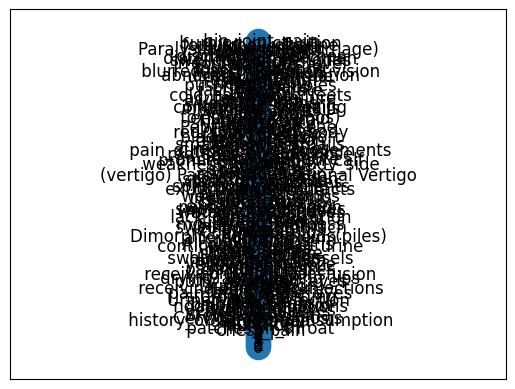

In [285]:
nx.draw_networkx(G, pos=nx.drawing.bipartite_layout(G, disease), width=-3)


In [288]:
G.number_of_edges()

339

In [287]:
G.number_of_nodes()

183

In [254]:
nx.write_gexf(G, "test.gexf")

In [264]:
disease_degree = {}
for i in G.nodes():
    if(type(i) == str):
        if(i in disease):
            disease_degree[i] = G.degree[i]


sorted_disease_degree = sorted(disease_degree.items(), key=lambda x:x[1])
converted_dict = dict(sorted_disease_degree)

print(converted_dict)


{'Fungal infection': 4, 'Allergy': 4, 'AIDS': 4, 'Gastroenteritis': 4, 'Paralysis (brain hemorrhage)': 4, 'Heart attack': 4, 'Acne': 4, 'Urinary tract infection': 4, 'Drug Reaction': 5, 'Hypertension ': 5, 'Cervical spondylosis': 5, 'Dimorphic hemmorhoids(piles)': 5, 'Arthritis': 5, 'Impetigo': 5, 'GERD': 6, 'Peptic ulcer diseae': 6, 'Bronchial Asthma': 6, 'Hepatitis C': 6, 'Osteoarthristis': 6, '(vertigo) Paroymsal  Positional Vertigo': 6, 'Psoriasis': 6, 'Chronic cholestasis': 7, 'Alcoholic hepatitis': 7, 'Varicose veins': 7, 'Jaundice': 8, 'Malaria': 8, 'Migraine': 9, 'Hepatitis D': 9, 'Diabetes ': 10, 'Chicken pox': 11, 'Typhoid': 11, 'hepatitis A': 11, 'Pneumonia': 11, 'Hyperthyroidism': 11, 'Hepatitis B': 12, 'Hypoglycemia': 12, 'Hepatitis E': 13, 'Hypothyroidism': 13, 'Dengue': 14, 'Tuberculosis': 16, 'Common Cold': 17}


In [265]:
symp_degree = {}
for i in G.nodes():
    if(type(i) == str):
        if(i in symptoms):
            symp_degree[i] = G.degree[i]


sorted_symp_degree = sorted(symp_degree.items(), key=lambda x:x[1])
converted_dict = dict(sorted_symp_degree)

print(converted_dict)


{' nodal_skin_eruptions': 1, ' dischromic _patches': 1, ' shivering': 1, ' watering_from_eyes': 1, ' ulcers_on_tongue': 1, ' spotting_ urination': 1, ' passage_of_gases': 1, ' internal_itching': 1, ' muscle_wasting': 1, ' patches_in_throat': 1, ' extra_marital_contacts': 1, ' irregular_sugar_level': 1, ' increased_appetite': 1, ' polyuria': 1, ' sunken_eyes': 1, ' dehydration': 1, ' mucoid_sputum': 1, ' lack_of_concentration': 1, ' weakness_in_limbs': 1, ' weakness_of_one_body_side': 1, ' altered_sensorium': 1, ' pain_behind_the_eyes': 1, ' toxic_look_(typhos)': 1, ' belly_pain': 1, ' yellow_urine': 1, ' receiving_blood_transfusion': 1, ' receiving_unsterile_injections': 1, ' coma': 1, ' stomach_bleeding': 1, ' acute_liver_failure': 1, ' swelling_of_stomach': 1, ' distention_of_abdomen': 1, ' history_of_alcohol_consumption': 1, ' fluid_overload': 1, ' blood_in_sputum': 1, ' throat_irritation': 1, ' redness_of_eyes': 1, ' sinus_pressure': 1, ' runny_nose': 1, ' congestion': 1, ' loss_of

In [266]:
# MOST COMMON SYMPTOMS
symptoms_degree = {}
for i in G.nodes():
    if(type(i) == str):
        if(i in symptoms):
            if((G.degree[i])>5):
                symptoms_degree[i] = G.degree[i]


sorted_symptoms_degree = sorted(symptoms_degree.items(), key=lambda x:x[1],reverse=True)
converted_dict = dict(sorted_symptoms_degree)

common_symp = list(converted_dict.keys())
print(common_symp)


[' vomiting', ' fatigue', ' high_fever', ' headache', ' nausea', ' loss_of_appetite', ' abdominal_pain', ' yellowish_skin', ' skin_rash', ' chills', ' yellowing_of_eyes', 'itching', ' chest_pain', ' sweating', ' malaise', ' joint_pain']


In [267]:
# MOST RARE SYMPTOMS
symptoms_degree = {}
for i in G.nodes():
    if(type(i) == str):
        if(i in symptoms):
            if((G.degree[i])<2):
                symptoms_degree[i] = G.degree[i]


sorted_symptoms_degree = sorted(symptoms_degree.items(), key=lambda x:x[1],reverse=True)
converted_dict = dict(sorted_symptoms_degree)

rare_symp = list(converted_dict.keys())
print(rare_symp)


[' nodal_skin_eruptions', ' dischromic _patches', ' shivering', ' watering_from_eyes', ' ulcers_on_tongue', ' spotting_ urination', ' passage_of_gases', ' internal_itching', ' muscle_wasting', ' patches_in_throat', ' extra_marital_contacts', ' irregular_sugar_level', ' increased_appetite', ' polyuria', ' sunken_eyes', ' dehydration', ' mucoid_sputum', ' lack_of_concentration', ' weakness_in_limbs', ' weakness_of_one_body_side', ' altered_sensorium', ' pain_behind_the_eyes', ' toxic_look_(typhos)', ' belly_pain', ' yellow_urine', ' receiving_blood_transfusion', ' receiving_unsterile_injections', ' coma', ' stomach_bleeding', ' acute_liver_failure', ' swelling_of_stomach', ' distention_of_abdomen', ' history_of_alcohol_consumption', ' fluid_overload', ' blood_in_sputum', ' throat_irritation', ' redness_of_eyes', ' sinus_pressure', ' runny_nose', ' congestion', ' loss_of_smell', ' rusty_sputum', ' pain_during_bowel_movements', ' pain_in_anal_region', ' bloody_stool', ' irritation_in_anus'

In [268]:
def fetch_connected_nodes(G, node, seen=None):
    if seen == None:
        seen = set()
    for neighbor in G.neighbors(node):
        if(neighbor in symptoms):
            if neighbor not in seen:
                seen.add(neighbor)
                fetch_connected_nodes(G, neighbor, seen)
    return seen


def fetch_connected_nodes_for_symptoms(G, node, seen=None):
    final_list = []
    if seen == None:
        seen = set()
    for neighbor in G.neighbors(node):
        if(neighbor in disease):
            final_list.append(neighbor)
            if neighbor not in seen:
                seen.add(neighbor)
                fetch_connected_nodes_for_symptoms(G, neighbor, seen)
    return final_list


In [269]:
list(fetch_connected_nodes(G, 'Impetigo'))

[' high_fever',
 ' blister',
 ' skin_rash',
 ' yellow_crust_ooze',
 ' red_sore_around_nose']

In [273]:
from operator import eq

# MOST COMMON DISEASES
# Initially we kept threshold to 50%, which resulted in zero nodes. Since the Common symptoms are less, we decreased the threshold to 25%
print("Initially we kept threshold to 50%, which resulted in zero nodes. Since the Common symptoms are less, we decreased the threshold to 25%\n")
common_diseases = []
for i in G.nodes():
    if(type(i) == str):
        if(i in disease):
            connected_list = list(fetch_connected_nodes(G, i))
            res = sum(map(eq, connected_list, common_symp))
            if(res >= (len(connected_list)/4)):
                # print(list(fetch_connected_nodes(G, i)),
                #       res, (len(connected_list)/4))
                common_diseases.append(i)
print()
print(common_diseases)


Initially we kept threshold to 50%, which resulted in zero nodes. Since the Common symptoms are less, we decreased the threshold to 25%


['AIDS', 'Gastroenteritis', 'Paralysis (brain hemorrhage)', 'Heart attack']


In [280]:
# NEXT POSSIBLE DISEASE

from mimetypes import init

print("Finding the next possible disease for: ")
text_inp = input()
print(text_inp)
print()
projected_graph = bipartite.weighted_projected_graph(G, [text_inp])

next_possible_dict = {}
for i in projected_graph.edges(data=True):
    next_possible_dict[i[1]] = i[2]['weight']

next_possible_dict = sorted(
    next_possible_dict.items(), key=lambda x: x[1], reverse=True)
sorted_next_possible_dict = dict(next_possible_dict)

next_possible = {}
is_first = True
for s in sorted_next_possible_dict:
    if(is_first == True):
        init_disease = s
        init_disease_severity = sorted_next_possible_dict[s]
        is_first = False
        next_possible[init_disease] = init_disease_severity
    else:
        if sorted_next_possible_dict[s] > init_disease_severity/2:
            next_possible[s] = sorted_next_possible_dict[s]


print(next_possible)


Finding the next possible disease for: 
Chicken pox

{'Dengue': 7, 'Tuberculosis': 6, 'Hepatitis B': 5, 'Common Cold': 5}


In [279]:
# print("No of Symptoms: ")
# no_of_symp = int(input())
find_symp = [' vomiting', ' chest_pain', ' breathlessness', ' sweating']

find_symp = [' high_fever',
             ' blister',
             ' skin_rash']

print("Given Symptoms: ", find_symp)


# for i in range(0, no_of_symp):
#     inpp = input()
#     find_symp.append(inpp)
temp_dis_list = []
for symp in find_symp:
    temp_dis_list += fetch_connected_nodes_for_symptoms(G, symp)
# print(temp_dis_list)
dis_value_dict = {x: temp_dis_list.count(x) for x in temp_dis_list}
# print(dis_value_dict)
dis_value_dict = sorted(dis_value_dict.items(),
                        key=lambda x: x[1], reverse=True)
sorted_dis_value_dict = dict(dis_value_dict)

predicted_disease = {}
is_first = True
for s in sorted_dis_value_dict:
    if(is_first == True):
        init_disease = s
        init_disease_possibility = sorted_dis_value_dict[s]
        is_first = False
        predicted_disease[init_disease] = init_disease_possibility
    else:
        if sorted_dis_value_dict[s] > init_disease_possibility/2:
            predicted_disease[s] = sorted_dis_value_dict[s]

print("Predicted Diseases: ", predicted_disease)


Given Symptoms:  [' high_fever', ' blister', ' skin_rash']
Predicted Diseases:  {'Impetigo': 3, 'Chicken pox': 2, 'Dengue': 2}
